## About project

### Credit Card Approval — A binary classification task for good or bad credit scores, if the people can be a risk for defaulting credit card loans.

## Task 
### Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given, unbalance data problem is a big problem in this task.

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading and reading data

In [2]:
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
application.sample(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
248442,6046372,M,N,Y,1,180000.0,Working,Secondary / secondary special,Civil marriage,Rented apartment,-16140,-425,1,0,0,1,Drivers,3.0
14900,5042090,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-19495,-1678,1,0,1,0,Accountants,2.0
280359,6120733,F,Y,Y,2,135000.0,Working,Higher education,Married,House / apartment,-13533,-4854,1,0,0,1,Laborers,4.0
329107,6317622,F,N,Y,0,126000.0,Working,Higher education,Married,House / apartment,-22898,-1063,1,0,0,1,Core staff,2.0
131710,5619491,M,Y,Y,0,261000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21782,365243,1,0,0,0,NaN,2.0
182112,5840041,F,N,N,1,315000.0,Working,Secondary / secondary special,Married,Municipal apartment,-13296,-1248,1,1,1,0,Laborers,3.0
379699,6603513,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,-10812,-1832,1,1,0,0,Core staff,2.0
42280,5117529,F,N,N,1,144000.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-14427,-3506,1,1,1,0,High skill tech staff,2.0
102988,5427866,F,N,N,0,153000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-20590,-5266,1,0,1,0,High skill tech staff,1.0
254834,6063048,M,Y,N,1,171000.0,Working,Secondary / secondary special,Married,House / apartment,-10761,-246,1,0,0,0,Drivers,3.0


In [4]:
credit.sample(10)

,ID,MONTHS_BALANCE,STATUS
394361,5046223,-23,X
607883,5078736,-15,X
301873,5028710,-13,C
1029510,5149170,-10,C
704537,5095779,-31,0
395267,5046263,-37,0
769543,5112849,-37,C
1035171,5149498,-8,0
330121,5033887,-28,X
861969,5120171,-22,0


### Merging application and credit data to make a single Dataset (df)

In [5]:
df = pd.merge(application,credit, on = 'ID', how = 'inner')

In [6]:
df.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
775906,5118279,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-21363,365243,1,0,0,0,NaN,2.0,-7,C
162032,5036691,F,N,Y,1,67500.0,Working,Higher education,Married,House / apartment,-13212,-888,1,0,0,0,Sales staff,3.0,-44,X
102183,5024846,F,N,Y,0,157500.0,Working,Higher education,Single / not married,House / apartment,-11511,-519,1,0,0,0,High skill tech staff,1.0,0,C
319861,5061821,F,N,Y,0,112500.0,Working,Incomplete higher,Single / not married,Rented apartment,-8347,-1598,1,0,0,0,Laborers,1.0,-5,0
285487,5054263,M,Y,N,2,427500.0,Commercial associate,Higher education,Married,House / apartment,-14561,-4745,1,0,1,0,NaN,4.0,-8,C


In [7]:
df.shape

(777715, 20)

#### Dataset has 777715 rows and 20 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

#### Droping unwanted columns

In [10]:
df.drop(['ID','FLAG_OWN_REALTY','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL', 'MONTHS_BALANCE'], axis = 1, inplace = True)

In [11]:
df.shape 

## After droping Columns now this dataset has 777715 Rows and 13 columns 

(777715, 13)

In [12]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'STATUS'],
      dtype='object')

#### Renaming Columns for better understanding 

In [13]:
df.rename({'CODE_GENDER':'Gender', 'FLAG_OWN_CAR':'Own Car','CNT_CHILDREN':'No of Children','AMT_INCOME_TOTAL':'Annual Income',
          'NAME_INCOME_TYPE':'Income category','NAME_EDUCATION_TYPE':'Education level','NAME_FAMILY_STATUS':'Marital status',
          'NAME_HOUSING_TYPE':'Way of living','DAYS_BIRTH':'Age','DAYS_EMPLOYED':'years into job','OCCUPATION_TYPE':'Occupation type','CNT_FAM_MEMBERS':'Count of family members'},
         axis = 1, inplace = True)

In [14]:
df.sample(5)

,Gender,Own Car,No of Children,Annual Income,Income category,Education level,Marital status,Way of living,Age,years into job,Occupation type,Count of family members,STATUS
171875,F,Y,0,162000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-18251,-3019,Managers,2.0,X
260450,M,N,0,225000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10570,-1175,Managers,2.0,C
746468,M,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14636,-3850,NaN,4.0,0
577199,M,N,0,171000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18162,-4849,Laborers,2.0,X
43246,F,N,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-20066,-3988,Private service staff,2.0,0


In [15]:
df.columns

Index(['Gender', 'Own Car', 'No of Children', 'Annual Income',
       'Income category', 'Education level', 'Marital status', 'Way of living',
       'Age', 'years into job', 'Occupation type', 'Count of family members',
       'STATUS'],
      dtype='object')

In [16]:
df.shape

(777715, 13)

#### Checking Duplicates in dataset

In [17]:
df.duplicated().sum()

### This dataset has 751843 duplicate rows

751843

### Droping those Duplicate rows 

In [18]:
df.drop_duplicates(inplace = True)

#### Checking shape of dataset after romoval of duplicates 

In [19]:
df.shape

(25872, 13)

#### Checing missing value percentage for every column 

In [20]:
100*df.isna().sum()/len(df)

### Occupation type has 30.52% null values rest columns do not contain any null values

Gender                      0.000000
Own Car                     0.000000
No of Children              0.000000
Annual Income               0.000000
Income category             0.000000
Education level             0.000000
Marital status              0.000000
Way of living               0.000000
Age                         0.000000
years into job              0.000000
Occupation type            30.523346
Count of family members     0.000000
STATUS                      0.000000
dtype: float64

#### Filtering null values of Occupation type column into a new dataframe 

In [21]:
dummy = df[df['Occupation type'].isna()]
dummy.sample(5)

,Gender,Own Car,No of Children,Annual Income,Income category,Education level,Marital status,Way of living,Age,years into job,Occupation type,Count of family members,STATUS
361631,M,Y,0,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20859,365243,NaN,2.0,0
220641,F,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19057,-3913,NaN,1.0,0
264686,F,N,0,45000.0,Pensioner,Lower secondary,Married,House / apartment,-22250,365243,NaN,2.0,0
317891,F,N,0,193500.0,Pensioner,Incomplete higher,Widow,House / apartment,-24295,365243,NaN,1.0,0
207374,F,Y,1,157500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-10433,-2959,NaN,3.0,X


#### in above dataset it is clearly visible that there are Null values for diffrent diffrent Income category group so we can not directly fill these Null values with mode , and from below code we can see that there are null values in Occupation type column for every category present in Income category column

In [22]:
dummy['Income category'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Student'], dtype=object)

#### Filling Null values in Occupation type with not working for those rows where income type is either students or pensioners 

In [23]:
df.loc[(df['Income category'] == 'Student') | (df['Income category'] == 'Pensioner'), 'Occupation type'] = 'Not working'

#### after imputing values we can see that Null value percentage has dropped to 13.34% from 30.52%

In [24]:
100*df.isna().sum()/len(df)

Gender                      0.00000
Own Car                     0.00000
No of Children              0.00000
Annual Income               0.00000
Income category             0.00000
Education level             0.00000
Marital status              0.00000
Way of living               0.00000
Age                         0.00000
years into job              0.00000
Occupation type            13.34261
Count of family members     0.00000
STATUS                      0.00000
dtype: float64

#### Dropping Null values 

In [25]:
df.dropna(inplace = True)
100*df.isna().sum()/len(df)

Gender                     0.0
Own Car                    0.0
No of Children             0.0
Annual Income              0.0
Income category            0.0
Education level            0.0
Marital status             0.0
Way of living              0.0
Age                        0.0
years into job             0.0
Occupation type            0.0
Count of family members    0.0
STATUS                     0.0
dtype: float64

In [26]:
df['Marital status'].unique()

array(['Married', 'Single / not married', 'Separated', 'Civil marriage',
       'Widow'], dtype=object)

#### converting diffrent status present in Marital Status to only 2 status single or Married

In [27]:
def fun(x):
    if x == 'Married' or x == 'Civil marriage':
        return 'Married'
    else:
        return 'Single'
df['Marital status'] = df['Marital status'].apply(fun)

In [28]:
df['Marital status'].unique()

array(['Married', 'Single'], dtype=object)

#### checking unique values in Age column here age are in days and 0 means today -1 means one day before and -365 means one year ago

In [29]:
df['Age'].unique()

array([-21474, -19110, -22464, ..., -13080, -21590,  -9188], dtype=int64)

#### Converting values in age columns in Year and changing datatype to integer for better understanding 

In [30]:
df['Age'] = (-1*df['Age'])//365

In [31]:
df['Age'].unique()

array([58, 52, 61, 46, 48, 29, 27, 34, 32, 56, 43, 44, 45, 55, 42, 37, 57,
       51, 54, 39, 28, 30, 24, 20, 38, 40, 33, 36, 35, 41, 59, 26, 50, 53,
       62, 60, 63, 25, 22, 23, 64, 47, 31, 49, 65, 21, 66, 67, 68],
      dtype=int64)

#### checking unique values in years into job column here values are in days and 0 means today -1 means one day before and -365 means one year ago and +365 means unemployed since 1 year

In [32]:
df['years into job'].unique()

array([ -1134,  -3051, 365243, ...,  -1394,  -8161,   -606], dtype=int64)

#### Converting values in years into job columns in Year and changing datatype to integer for better understanding 

In [33]:
df['years into job'] = (-1*df['years into job'])//365

In [34]:
df['years into job'].unique()

array([    3,     8, -1001,     2,     4,     5,    12,    19,    14,
          13,     6,    17,    29,     7,     1,    15,    11,     0,
          10,    23,    24,    20,     9,    26,    18,    21,    22,
          16,    28,    27,    38,    32,    31,    36,    37,    30,
          39,    34,    25,    33,    40,    35,    43,    42],
      dtype=int64)

In [35]:
df.loc[df['years into job'] < 0, 'years into job'] = 0

#### Explaining Status column 

In [36]:
df['STATUS'].unique()

# 0: 1-29 days past  ( This category indicates that the payment is overdue by 1 to 29 days.) 
# 1: 30-59 days past due (This category indicates that the payment is overdue by 30 to 59 days.)
# 2: 60-89 days overdue (This category indicates that the payment is overdue by 60 to 89 days.)
# 3: 90-119 days overdue (This category indicates that the payment is overdue by 90 to 119 days.)
# 4: 120-149 days overdue (This category indicates that the payment is overdue by 120 to 149 days.)
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan 

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

#### we have classified customers into good customer and bad customer (1 for good and 0 for bad)

In [37]:
df['STATUS'] = np.where((df['STATUS'] == '1')|(df['STATUS'] == '2') | (df['STATUS'] == '3' )| (df['STATUS'] == '4' )| (df['STATUS'] == '5'), 0, 1)

In [38]:
df['STATUS'].unique()

array([1, 0])

In [39]:
df['Count of family members'] = np.where((df['Count of family members'] < 4), 1,0)

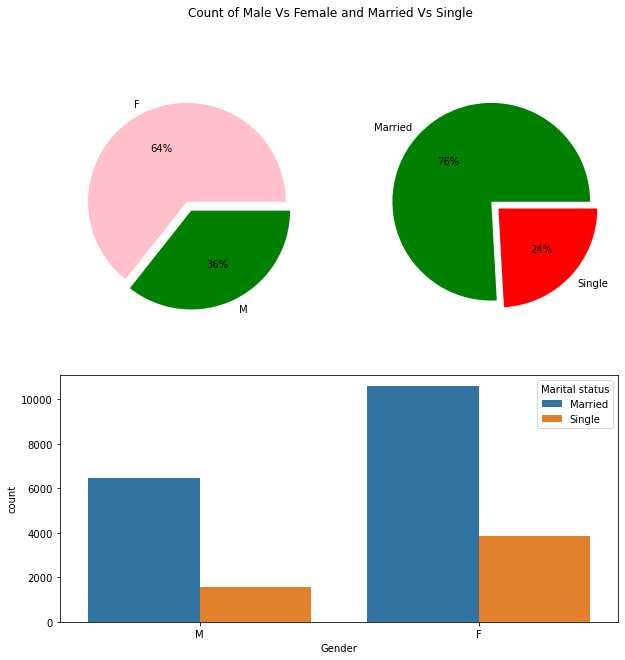

In [40]:
gender_info = df['Gender'].value_counts().reset_index()
marital_status = df['Marital status'].value_counts().reset_index()

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
explode = [0, 0.1]
plt.pie(gender_info['Gender'], labels=gender_info['index'],colors=['pink','green'],explode=explode, autopct='%.0f%%');

plt.subplot(2,2,2)
explode = [0, 0.1]
plt.pie(marital_status['Marital status'], labels=marital_status['index'],colors=['green','red'],explode=explode, autopct='%.0f%%');


plt.subplot(2,1,2)
sns.countplot(df['Gender'], hue = df['Marital status']);
plt.suptitle('Count of Male Vs Female and Married Vs Single');

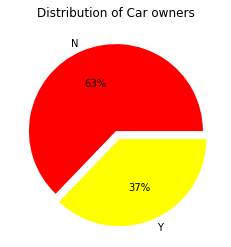

In [41]:
own_car = df['Own Car'].value_counts().reset_index()

explode = [0, 0.1]
plt.pie(own_car['Own Car'], labels=own_car['index'],colors=['red','yellow'],explode=explode, autopct='%.0f%%');
plt.title('Distribution of Car owners');

#### Checking distribution of 'Age', 'Annual Income' and 'years into job' columns

<AxesSubplot:xlabel='years into job', ylabel='Density'>

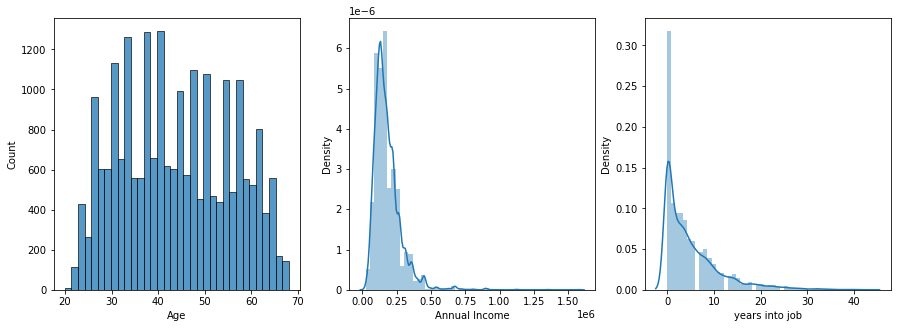

In [42]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.histplot(df['Age'])

plt.subplot(1,3,2)
sns.distplot(df['Annual Income'])

plt.subplot(1,3,3)
sns.distplot(df['years into job'])

#### In above Figures we can observe that Age is normally distributed but Annual Income and year into job are Right skewed so while building model we will convert values in these two columns into normally distributed values

#### Plotting Distribution of Good and Bad customers on basis of income category, education, way of life and Occupation type by ploting stacked bar chart 

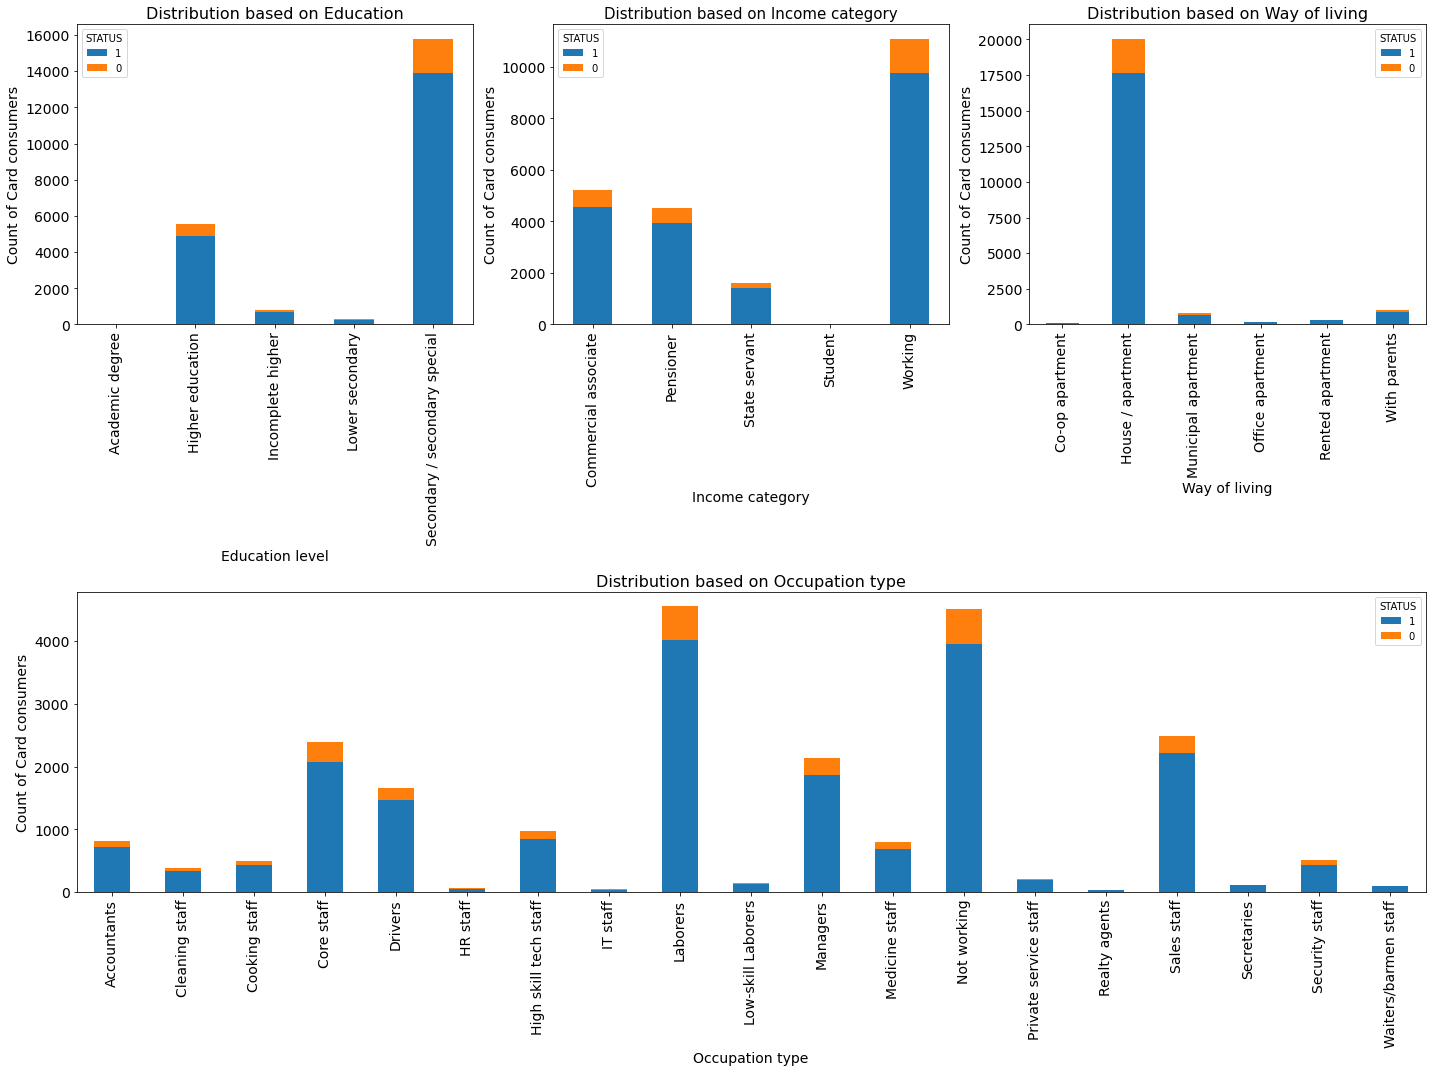

In [43]:
import matplotlib.pyplot as plt

# Copy the relevant columns from the original dataframe
education_status = df[['Education level','STATUS']].copy()
education_status['new'] = education_status['STATUS']

income_type = df[['Income category','STATUS']].copy()
income_type['new'] = income_type['STATUS']

lifestyle = df[['Way of living','STATUS']].copy()
lifestyle['new'] = lifestyle['STATUS']

occupation_type = df[['Occupation type','STATUS']].copy()
occupation_type['new'] = occupation_type['STATUS']

# Group the dataframe by 'Education level' and 'STATUS' and calculate the count of 'new'
grouped_data = education_status.groupby(['Education level', 'STATUS'])['new'].count().unstack()

# Group the dataframe by 'Income category' and 'STATUS' and calculate the count of 'new'
income_type_data = income_type.groupby(['Income category', 'STATUS'])['new'].count().unstack()

# Group the dataframe by 'Way of living' and 'STATUS' and calculate the count of 'new'
lifestyle_data = lifestyle.groupby(['Way of living', 'STATUS'])['new'].count().unstack()

# Group the dataframe by 'Occupation type' and 'STATUS' and calculate the count of 'new'
occupation_type_data = occupation_type.groupby(['Occupation type', 'STATUS'])['new'].count().unstack()

# Reverse the order of the columns
grouped_data = grouped_data.iloc[:, ::-1]
income_type_data = income_type_data.iloc[:, ::-1]
lifestyle_data = lifestyle_data.iloc[:, ::-1]
occupation_type_data = occupation_type_data.iloc[:, ::-1]

# Set up the subplots
fig = plt.figure(figsize=(20, 15))

# Plot the stacked bar charts
ax1 = fig.add_subplot(231)
grouped_data.plot(kind='bar', stacked=True, ax=ax1)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.set_xlabel('Education level', fontsize = 14)
ax1.set_ylabel('Count of Card consumers',fontsize = 14)
ax1.set_title('Distribution based on Education',fontsize = 16)

ax2 = fig.add_subplot(232)
income_type_data.plot(kind='bar', stacked=True, ax=ax2)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax2.set_xlabel('Income category',fontsize = 14)
ax2.set_ylabel('Count of Card consumers',fontsize = 14)
ax2.set_title('Distribution based on Income category',fontsize = 15)

ax3 = fig.add_subplot(233)
lifestyle_data.plot(kind='bar', stacked=True, ax=ax3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax3.set_xlabel('Way of living',fontsize = 14)
ax3.set_ylabel('Count of Card consumers',fontsize = 14)
ax3.set_title('Distribution based on Way of living',fontsize = 16)

ax4 = fig.add_subplot(212)
occupation_type_data.plot(kind='bar', stacked=True, ax=ax4)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax4.set_xlabel('Occupation type',fontsize = 14)
ax4.set_ylabel('Count of Card consumers',fontsize = 14)
ax4.set_title('Distribution based on Occupation type',fontsize = 16)

# Adjust the layout
plt.tight_layout()

# Display the chart
plt.show()


### Q1. Is there any relation between gender and card holder's behaviour(whether consumer is good or bad)

In [44]:
# Card holder's behaviour is dependent on card holder's gender (check between 2 predictor variable)
# Using Chi-Square test

from scipy.stats import chi2_contingency

# Null hypothesis: There is no relationship between card holder's behaviour and card holder's gender.
# Alternative hypothesis: There is a relationship between card holder's behaviour and card holder's gender.


chi2, p , dof, expected = chi2_contingency(pd.crosstab(df['Gender'],df['STATUS']))

print('Chi-square test statistic:', chi2)
print()
print('p-value:', p)
print()
print('Degrees of freedom:', dof)
print()
print('Expected frequencies:\n', expected)
print()

alpha = 0.05
if p < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Chi-square test statistic: 3.4111254294616424

p-value: 0.06475826698030353

Degrees of freedom: 1

Expected frequencies:
 [[ 1761.87002676 12665.12997324]
 [  976.12997324  7016.87002676]]

Failed to reject Null Hypothesis H0


#### Ans1. Here it is evident from chi-square test that p_value is 0.0647 which is Greater than 0.05 so we can not reject null hypothesis hence we can state that Card holder's behaviour is independent of Gender

#### Q2. Can we say that people having car are more likly to be a good consumer or there is no significant relation between having car                     and card holder's behaviour ?

In [45]:
Own_car = df.loc[(df['Own Car'] == 'Y')]
Own_car_0 = Own_car[Own_car['STATUS'] == 0]
Own_car_1 = Own_car[Own_car['STATUS'] == 1]

print('Probability of Card holder being Bad and Own a Car ',round(len(Own_car_0)/len(Own_car),4))
print('Probability of Card holder being Good and Own a Car ',round(len(Own_car_1)/len(Own_car),4))
print()

No_car = df.loc[(df['Own Car'] == 'N')]
No_car_0 = No_car[No_car['STATUS'] == 0]
No_car_1 = No_car[No_car['STATUS'] == 1]

print('Probability of Card holder being Bad and do not Own a Car ',round(len(No_car_0)/len(No_car),4))
print('Probability of Card holder being Good and do not Own a Car ',round(len(No_car_1)/len(No_car),4))
print()

# Card holder's behaviour is dependent on Owning a Car (check between 2 predictor variable)
# Using Chi-Square test

# Null hypothesis: There is no relationship between card holder's behaviour and Owning a Car.
# Alternative hypothesis: There is a relationship between card holder's behaviour and Owning a Car.


chi2, p , dof, expected = chi2_contingency(pd.crosstab(df['Own Car'],df['STATUS']))

print('Chi-square test statistic:', chi2)
print()
print('p-value:', p)
print()
print('Degrees of freedom:', dof)
print()
print('Expected frequencies:\n', expected)
print()

alpha = 0.05
if p < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Probability of Card holder being Bad and Own a Car  0.1222
Probability of Card holder being Good and Own a Car  0.8778

Probability of Card holder being Bad and do not Own a Car  0.1221
Probability of Card holder being Good and do not Own a Car  0.8779

Chi-square test statistic: 0.0002304246807272965

p-value: 0.9878887803596789

Degrees of freedom: 1

Expected frequencies:
 [[ 1719.85967886 12363.14032114]
 [ 1018.14032114  7318.85967886]]

Failed to reject Null Hypothesis H0


#### Ans2. Here it is evident from chi-square test that p_value is 0.0647 which is Greater than 0.05 so we can not reject null hypothesis hence we can state that Card holder's behaviour is independent of Owning a Car

In [46]:
M_status = df.loc[(df['Marital status'] == 'Married')]
M_status_0 = M_status[M_status['STATUS'] == 0]
M_status_1 = M_status[M_status['STATUS'] == 1]

print('Probability of Card holder being Bad Given they are Married ',round(len(M_status_0)/len(M_status),4))
print('Probability of Card holder being Bad Given they are Married ',round(len(M_status_1)/len(M_status),4))
print()

S_status = df.loc[(df['Marital status'] == 'Single')]
S_status_0 = S_status[S_status['STATUS'] == 0]
S_status_1 = S_status[S_status['STATUS'] == 1]

print('Probability of Card holder being Bad Given they are Single ',round(len(S_status_0)/len(S_status),4))
print('Probability of Card holder being Good Given they are Single ',round(len(S_status_1)/len(S_status),4))
print()

# Card holder's behaviour is dependent on Marital Status (check between 2 predictor variable)
# Using Chi-Square test

# Null hypothesis: There is no relationship between card holder's behaviour and Marital Status.
# Alternative hypothesis: There is a relationship between card holder's behaviour and Marital Status.


chi2, p , dof, expected = chi2_contingency(pd.crosstab(df['Marital status'],df['STATUS']))

print('Chi-square test statistic:', chi2)
print()
print('p-value:', p)
print()
print('Degrees of freedom:', dof)
print()
print('Expected frequencies:\n', expected)
print()

alpha = 0.05
if p < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Probability of Card holder being Bad Given they are Married  0.118
Probability of Card holder being Bad Given they are Married  0.882

Probability of Card holder being Bad Given they are Single  0.135
Probability of Card holder being Good Given they are Single  0.865

Chi-square test statistic: 10.919920051529756

p-value: 0.000951357148419561

Degrees of freedom: 1

Expected frequencies:
 [[ 2077.80249777 14936.19750223]
 [  660.19750223  4745.80249777]]

we reject Null Hypothesis H0


#### Ans3. Here it is evident from chi-square test that p_value is 0.00095 which is Less than 0.05 so we can reject null hypothesis hence we can state that Card holder's behaviour is dependent on Marital Status

#### Q4. Probabilities of Card holder's being good or bad based on their educational background 

In [47]:
contingency_table = pd.crosstab(df['Education level'], df['STATUS'])

# Calculate the conditional probabilities
conditional_probabilities = contingency_table.div(contingency_table.sum(axis=1), axis=0)


print('Validation Part A Using probability')
print()
# Print the conditional probabilities
print(conditional_probabilities)

# Card holder's behaviour is dependent on Education level (check between 2 predictor variable)
# Using Chi-Square test

# Null hypothesis: There is no relationship between card holder's behaviour and Education level.
# Alternative hypothesis: There is a relationship between card holder's behaviour and Education level.


chi2, p , dof, expected = chi2_contingency(pd.crosstab(df['Education level'],df['STATUS']))

print()
print('Validation Part B using Statistics')
print()
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Validation Part A Using probability

STATUS                                0         1
Education level                                  
Academic degree                0.125000  0.875000
Higher education               0.124394  0.875606
Incomplete higher              0.126302  0.873698
Lower secondary                0.159420  0.840580
Secondary / secondary special  0.120466  0.879534

Validation Part B using Statistics

p-value: 0.35706226012714176
Failed to reject Null Hypothesis H0


#### Ans4. From validation A, one can observe that probbility of being good is almost similar for every education level and this is further again proved statiscally in Validation Part B that there is no impact of education on customer being good or bad

#### Q.5 Is there any impact of Annual salary on Customer being Good or Bad

In [48]:
bin_edges = [0, 100000, 200000, 300000, float('inf')]
bin_labels = ['Low Salary', 'Medium Salary', 'High Salary', 'Very High Salary']

# assigning the data into the bins and add a new column to the DataFrame
df['Salary Category'] = pd.cut(df['Annual Income'], bins=bin_edges, labels=bin_labels)



# Null hypothesis: There is no relationship between card holder's behaviour and Annual Income.
# Alternative hypothesis: There is a relationship between card holder's behaviour and Annual Income.
chi2, p , dof, expected = chi2_contingency(pd.crosstab(df['Salary Category'],df['STATUS']))

print('Validation using Statistics')
print()
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Validation using Statistics

p-value: 0.005110187946213037
we reject Null Hypothesis H0


## Model Building (Prediction of Good and Bad customers) using logstic regression 

### Logistic regression is a statistical model used for binary classification, where the outcome variable is categorical and has two possible values (e.g., yes/no, true/false, 0/1). It is a type of generalized linear model (GLM) that estimates the probability of the binary outcome based on a set of predictor variables.


In [49]:
df.sample(5)

,Gender,Own Car,No of Children,Annual Income,Income category,Education level,Marital status,Way of living,Age,years into job,Occupation type,Count of family members,STATUS,Salary Category
453876,F,N,0,157500.0,Working,Higher education,Married,House / apartment,33,11,Core staff,1,1,Medium Salary
144172,M,N,0,90000.0,Working,Higher education,Single,With parents,31,2,Laborers,1,1,Low Salary
512812,F,Y,2,135000.0,Commercial associate,Higher education,Married,House / apartment,27,3,Managers,0,1,Medium Salary
539762,F,Y,2,112500.0,Working,Higher education,Married,House / apartment,36,8,Accountants,0,1,Medium Salary
240670,M,Y,1,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,33,2,Laborers,1,1,High Salary


#### Dropping some columns for simplification of model and reduction in noise 

In [50]:
df.drop(['Count of family members','Occupation type','Salary Category','Way of living'], axis = 1, inplace = True)

In [51]:
df.sample(3)

,Gender,Own Car,No of Children,Annual Income,Income category,Education level,Marital status,Age,years into job,STATUS
356738,M,Y,0,202500.0,Working,Secondary / secondary special,Married,51,32,1
723115,F,Y,1,1575000.0,Commercial associate,Higher education,Single,27,6,0
731730,F,N,0,247500.0,Working,Secondary / secondary special,Single,47,14,1


#### Converting few column having binary values but non numeric values into column having binary values (0/1)

In [52]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df['Own Car'] = df['Own Car'].map({'N':0,'Y':1})
df['Marital status'] = df['Marital status'].map({'Single':0,'Married':1})

#### Creating dummy features for categorical variable with multiple levels

In [53]:
df = pd.get_dummies(df, columns = ['Income category','Education level'], drop_first = True)

In [54]:
df.sample(5)

,Gender,Own Car,No of Children,Annual Income,Marital status,Age,years into job,STATUS,Income category_Pensioner,Income category_State servant,Income category_Student,Income category_Working,Education level_Higher education,Education level_Incomplete higher,Education level_Lower secondary,Education level_Secondary / secondary special
194125,0,1,0,247500.0,1,32,6,1,0,0,0,1,1,0,0,0
2931,1,1,0,157500.0,1,27,2,1,0,0,0,1,0,0,0,1
407755,0,0,0,135000.0,0,57,9,1,0,0,0,1,0,0,0,1
566497,0,1,0,90000.0,1,67,0,1,1,0,0,0,1,0,0,0
548248,0,0,0,135000.0,1,57,0,1,1,0,0,0,0,0,0,1


#### Converting skewed columns into normally distributed columns using Log transformations 

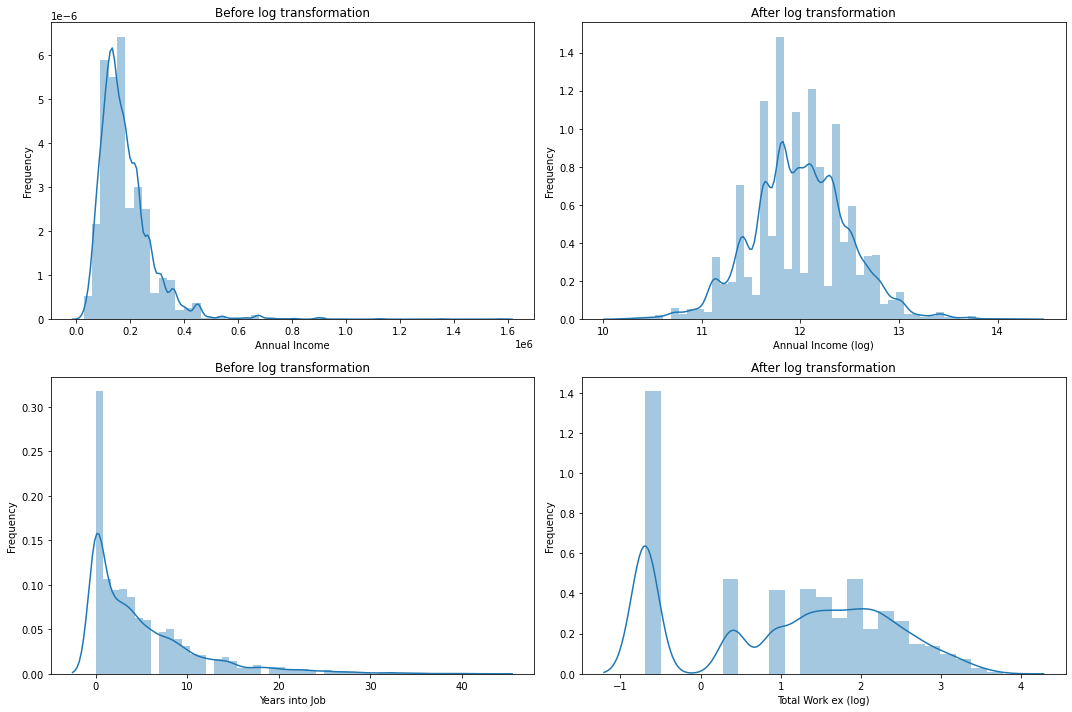

In [55]:
df['annual income'] = np.log(df['Annual Income'])
df['Total Work ex'] = np.log(df['years into job'] + 0.5)  # Add a small constant value (1e-8) to avoid zero or negative values
df['Total Work ex'].fillna(df['Total Work ex'].mean(), inplace=True)

# Create subplots with a 2x2 layout
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.distplot(df['Annual Income'])
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Before log transformation')

plt.subplot(2, 2, 2)
sns.distplot(df['annual income'])
plt.xlabel('Annual Income (log)')
plt.ylabel('Frequency')
plt.title('After log transformation')

plt.subplot(2, 2, 3)
sns.distplot(df['years into job'])
plt.xlabel('Years into Job')
plt.ylabel('Frequency')
plt.title('Before log transformation')

plt.subplot(2, 2, 4)
sns.distplot(df['Total Work ex'])
plt.xlabel('Total Work ex (log)')
plt.ylabel('Frequency')
plt.title('After log transformation')

plt.tight_layout()
plt.show()


<AxesSubplot:>

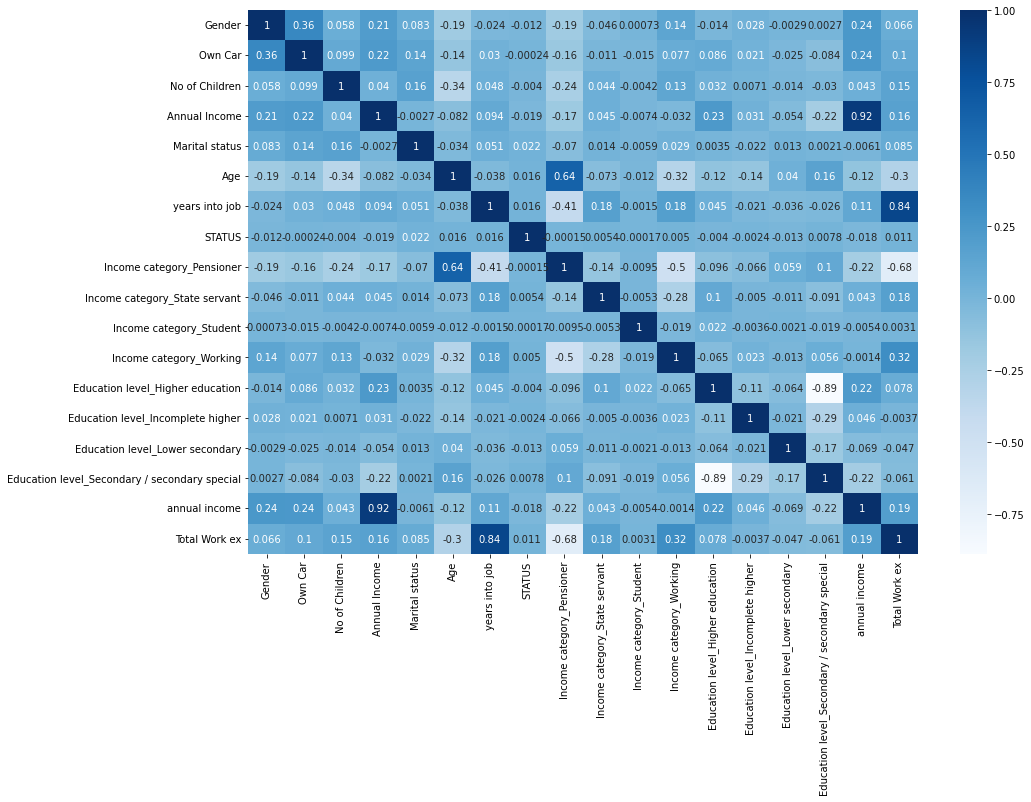

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

#### Creating independent variable(X) and dependent variable(y)

In [57]:
y = df.pop('STATUS')
X = df.copy()

#### Breaking dataset into train dataset and test dataset

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Creating logistic regression object

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### Choosing 5 most important variables using RFE method

In [153]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False])

#### Displaying columns which has been choosen by RFE method

In [62]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_ ))

[('Gender', False, 8),
 ('Own Car', False, 11),
 ('No of Children', False, 9),
 ('Annual Income', False, 12),
 ('Marital status', True, 1),
 ('Age', False, 10),
 ('years into job', False, 7),
 ('Income category_Pensioner', False, 4),
 ('Income category_State servant', False, 6),
 ('Income category_Student', False, 13),
 ('Income category_Working', False, 3),
 ('Education level_Higher education', False, 2),
 ('Education level_Incomplete higher', True, 1),
 ('Education level_Lower secondary', True, 1),
 ('Education level_Secondary / secondary special', True, 1),
 ('annual income', True, 1),
 ('Total Work ex', False, 5)]

In [63]:
col = X_train.columns[rfe.support_]

#### Doing further verification on columns by comparing p-values of features or independent variables 

In [64]:
import statsmodels.api as sm
import statsmodels.genmod.families as fam

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=fam.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STATUS   No. Observations:                17936
Model:                            GLM   Df Residuals:                    17930
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6587.9
Date:                Thu, 01 Jun 2023   Deviance:                       13176.
Time:                        20:22:39   Pearson chi2:                 1.79e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001394
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             3.2601      0.596      5.468      0.000       2.091       4.429
Marital status                                    0.1934      0.052      3.729      0.000       0.092       0.295
Education level_Incomplete higher                 0.0055      0.129      0.042      0.966      -0.248       0.259
Education level_Lower secondary                  -0.3373      0.191     -1.763      0.078      -0.712       0.038
Education level_Secondary / secondary special     0.0484      0.054      0.889      0.374      -0.058       0.155
annual income                                    -0.1205      0.049     -2.480      0.013      -0.216      -0.025
=================================================================================================================
"""

#### Eliminating Features with high p-values and checking p-values of remaining idependent variables and training model on train dataset

In [65]:
columns_to_remove = ['Education level_Incomplete higher']
X_train_new = X_train[col].drop(columns_to_remove, axis=1)

X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family=fam.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STATUS   No. Observations:                17936
Model:                            GLM   Df Residuals:                    17931
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6587.9
Date:                Thu, 01 Jun 2023   Deviance:                       13176.
Time:                        20:22:39   Pearson chi2:                 1.79e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001394
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             3.2617      0.595      5.481      0.000       2.095       4.428
Marital status                                    0.1933      0.052      3.729      0.000       0.092       0.295
Education level_Lower secondary                  -0.3380      0.191     -1.773      0.076      -0.711       0.036
Education level_Secondary / secondary special     0.0478      0.052      0.919      0.358      -0.054       0.150
annual income                                    -0.1205      0.049     -2.483      0.013      -0.216      -0.025
=================================================================================================================
"""

#### Making prediction on Test dataset but here we will only get answers in terms of probabiliies 

In [66]:
y_test_pred = res.predict(X_train_sm)
y_test_pred[:10]

94086     0.882095
104634    0.888821
411752    0.872275
167369    0.858512
23534     0.862672
211181    0.859649
103219    0.882589
481595    0.866092
166322    0.885348
308640    0.896814
dtype: float64

In [67]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.88209493, 0.88882147, 0.87227455, 0.85851162, 0.86267203,
       0.85964938, 0.88258903, 0.86609178, 0.88534798, 0.89681423])

In [72]:
y_test_pred_final = pd.DataFrame({'Behaviour':y_train,'Behaviour Predicted':y_test_pred}).reset_index()
y_test_pred_final.sample(5)

,index,Behaviour,Behaviour Predicted
3682,105864,1,0.871329
11103,324574,1,0.873396
7016,221007,1,0.870193
10654,530762,1,0.890975
9602,41408,1,0.888821


#### setting thrushold value(by hit and trail method) on probability for making prediction

In [133]:
y_test_pred_final['Predicted'] = y_test_pred_final['Behaviour Predicted'].map(lambda x: 1 if x>0.857 else 0)
y_test_pred_final.sample(5)

,index,Behaviour,Behaviour Predicted,Predicted
7311,562403,1,0.873123,1
1515,658710,1,0.880292,1
13378,250860,1,0.862672,1
15216,634040,1,0.883608,1
670,318557,0,0.868232,1


#### Creating Confusion matrix

In [154]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test_pred_final['Behaviour'],y_test_pred_final['Predicted'])

print(confusion)

[[  156  2006]
 [  871 14903]]


In [155]:
# Predicted         Bad                      Good
# Actual      
# Bad         156(True Negetive)    2006(False positive)
# Good        871(False Negetive)   14903(True Positive)

#### Checking accuracy of this Prediction model

In [156]:
print('Model accuracy is:- ',round(100*metrics.accuracy_score(y_test_pred_final['Behaviour'],y_test_pred_final['Predicted']),2),'%')

Model accuracy is:-  83.96 %


### Calculating Precision and Recall 
#### Precision represents the proportion of correctly predicted "good" customers (true positives) out of all customers predicted as "good" (true positives + false positives).
#### Recall (or sensitivity) represents the proportion of correctly predicted "good" customers (true positives) out of all actual "good" customers (true positives + false negatives).

In [157]:
# Confusion matrix values
true_positive = 14903
false_positive = 2006
false_negative = 871

# Calculate precision
precision = true_positive / (true_positive + false_positive)

# Calculate recall
recall = true_positive / (true_positive + false_negative)

# Print the results
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8813649535750192
Recall: 0.9447825535691644


In [158]:
# Confusion matrix values
true_positive = 14903
false_positive = 2006
false_negative = 871
true_negative = 156

# Calculate sensitivity (recall)
sensitivity = true_positive / (true_positive + false_negative)

# Calculate specificity
specificity = true_negative / (true_negative + false_positive)

# Print the results
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Sensitivity (Recall): 0.9447825535691644
Specificity: 0.07215541165587419
